# EDA demographic health data

## Set up

In [1]:
#!pip install edastatmil_milser
!pip install --upgrade edastatmil_milser
color = "#254025"


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from edastatmil_milser import edas_tatmil as EDA

total_data_raw = EDA.pd.read_csv(r'..\data\raw\demographic_health_data.csv', delimiter=',')
total_data_raw.head(10)


fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   
5  1011    10138   1198               11.816926    1130   
6  1013    19680   2351               11.946138    2461   
7  1015   114277  13141               11.499252   14637   
8  1017    33615   3869               11.509743    3812   
9  1019    26032   2554                9.811002    2981   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   
5                 11.146183   1395                 13.760110   1446   
6                 12.505081   2286                 11.615854   2337   
7                 12.808352  15463                 13.531157  13865   
8                 11.340176   4380                 13.029897   3734   
9                 11.451291   2852                 10.955747   2504   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   
5                 14.263168  ...          873                 20.6   
6                 11.875000  ...         1741                 18.6   
7                 12.132800  ...         9158                 14.7   
8                 11.108136  ...         2870                 17.5   
9                  9.618931  ...         2540                 15.9   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   
5                   19.4                   21.9             1651   
6                   17.5                   19.5             2841   
7                   13.6                   15.7            13182   
8                   16.6                   18.5             4664   
9                   14.7                   17.2             3353   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   
5             4.5               4.2               4.8         360   
6             4.3               4.1               4.6         662   
7             3.6               3.3               3.8        3204   
8             4.0               3.8               4.2        1068   
9             3.9               3.6               4.2         814   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  
5                 6  
6                 6  
7                 4  
8                 5  
9                 6  

[10 rows x 108 columns]

## Objetivo

Elegiremos la target mas adelante. diabetes_prevalence por ejemplo

## Exploración y limpieza superficial

### Dimensiones

In [3]:
categorical_list, numerical_list = EDA.explore(total_data_raw)

Rows: 3140
Columns: 108
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                                                               | Non-Null Count | Null Count | Data Type | Data Category |
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                     fips                                      |      3140      |     0      |   int64   |   Numerical   |
|                                    TOT_POP                                    |      3140      |     0      |   int64   |   Numerical   |
|                                      0-9                                      |      3140      |     0      |   int64   |   Numerical   |
|                            0-9 y/o % of total pop                             |      3140      |     0      |  float64  |   Numerical 

Vamos a limpiar un poco las columnas antes de empezar

In [4]:
tipo_variable = type(total_data_raw['diabetes_prevalence'].values)
print(tipo_variable)

<class 'numpy.ndarray'>


In [5]:
factorized_clean_data = EDA.factorize_categorical(total_data_raw,categorical_list)

In [6]:
EDA.explore(factorized_clean_data)

Rows: 3140
Columns: 110
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                                                               | Non-Null Count | Null Count | Data Type | Data Category |
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                     fips                                      |      3140      |     0      |   int64   |   Numerical   |
|                                    TOT_POP                                    |      3140      |     0      |   int64   |   Numerical   |
|                                      0-9                                      |      3140      |     0      |   int64   |   Numerical   |
|                            0-9 y/o % of total pop                             |      3140      |     0      |  float64  |   Numerical 

(['COUNTY_NAME_O', 'STATE_NAME_O'],
 ['fips',
  'TOT_POP',
  '0-9',
  '0-9 y/o % of total pop',
  '19-Oct',
  '10-19 y/o % of total pop',
  '20-29',
  '20-29 y/o % of total pop',
  '30-39',
  '30-39 y/o % of total pop',
  '40-49',
  '40-49 y/o % of total pop',
  '50-59',
  '50-59 y/o % of total pop',
  '60-69',
  '60-69 y/o % of total pop',
  '70-79',
  '70-79 y/o % of total pop',
  '80+',
  '80+ y/o % of total pop',
  'White-alone pop',
  '% White-alone',
  'Black-alone pop',
  '% Black-alone',
  'Native American/American Indian-alone pop',
  '% NA/AI-alone',
  'Asian-alone pop',
  '% Asian-alone',
  'Hawaiian/Pacific Islander-alone pop',
  '% Hawaiian/PI-alone',
  'Two or more races pop',
  '% Two or more races',
  'POP_ESTIMATE_2018',
  'N_POP_CHG_2018',
  'GQ_ESTIMATES_2018',
  'R_birth_2018',
  'R_death_2018',
  'R_NATURAL_INC_2018',
  'R_INTERNATIONAL_MIG_2018',
  'R_DOMESTIC_MIG_2018',
  'R_NET_MIG_2018',
  'Less than a high school diploma 2014-18',
  'High school diploma only 2

In [7]:
clean_data,clean_data_keys = EDA.feature_sel(factorized_clean_data[factorized_clean_data.columns.difference(['diabetes_prevalence','COUNTY_NAME_O','STATE_NAME_O'])],factorized_clean_data['diabetes_prevalence'].values,k=70,file_name='factorized_clean_data', method='SelectKBest', test='mutual_info_regression')

In [8]:
factorized_clean_data.head(10)

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   
5  1011    10138   1198               11.816926    1130   
6  1013    19680   2351               11.946138    2461   
7  1015   114277  13141               11.499252   14637   
8  1017    33615   3869               11.509743    3812   
9  1019    26032   2554                9.811002    2981   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   
5                 11.146183   1395                 13.760110   1446   
6                 12.505081   2286                 11.615854   2337   
7                 12.808352  15463                 13.531157  13865   
8                 11.340176   4380                 13.029897   3734   
9                 11.451291   2852                 10.955747   2504   

   30-39 y/o % of total pop  ...  diabetes_Lower 95% CI  \
0                 12.749771  ...                   11.9   
1                 11.564429  ...                   11.0   
2                 12.865239  ...                   18.6   
3                 13.897321  ...                   13.2   
4                 11.901798  ...                   12.6   
5                 14.263168  ...                   19.4   
6                 11.875000  ...                   17.5   
7                 12.132800  ...                   13.6   
8                 11.108136  ...                   16.6   
9                  9.618931  ...                   14.7   

   diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  CKD_Lower 95% CI  \
0                   13.8             5462             3.1               2.9   
1                   13.1            20520             3.2               3.0   
2                   20.6             3870             4.5               4.2   
3                   14.9             2511             3.3               3.1   
4                   14.5             6017             3.4               3.2   
5                   21.9             1651             4.5               4.2   
6                   19.5             2841             4.3               4.1   
7                   15.7            13182             3.6               3.3   
8                   18.5             4664             4.0               3.8   
9                   17.2             3353             3.9               3.6   

   CKD_Upper 95% CI  CKD_number  Urban_rural_code  COUNTY_NAME_O  STATE_NAME_O  
0               3.3        1326                 3        Autauga       Alabama  
1               3.5        5479                 4        Baldwin       Alabama  
2               4.8         887                 6        Barbour       Alabama  
3               3.6         595                 2           Bibb       Alabama  
4               3.7        1507                 2         Blount       Alabama  
5               4.8         360                 6        Bullock       Alabama  
6               4.6         662                 6         Butler       Alabama  
7               3.8        3204                 4        Calhoun       Alabama  
8               4.2        1068                 5       Chambers       Alabama  
9               4.2         814                 6       Cherokee       Alabama  

[10 rows x 110 columns]

In [9]:
clean_data.head(10)

% Asian-alone  % Black-alone  % White-alone      0-9   19-Oct    20-29  \
0       1.224798      19.630942      76.725239   6787.0   7637.0   6878.0   
1       1.150343       8.940382      87.285228  24757.0  26913.0  23579.0   
2       0.454162      48.398376      49.069571   2732.0   2960.0   3268.0   
3       0.236607      21.294643      76.834821   2456.0   2596.0   3029.0   
4       0.319848       1.642462      95.878285   7095.0   7570.0   6742.0   
5       0.187414      70.704281      26.247781   1198.0   1130.0   1395.0   
6       1.316057      44.913618      52.251016   2351.0   2461.0   2286.0   
7       0.964324      21.135487      75.278490  13141.0  14637.0  15463.0   
8       1.326789      40.000000      57.063811   3869.0   3812.0   4380.0   
9       0.338045       4.260141      93.027812   2554.0   2981.0   2852.0   

     30-39    40-49    50-59  70-79 y/o % of total pop  ...  \
0   7089.0   7582.0   7738.0                  7.284042  ...   
1  25213.0  27338.0  29986.0                  9.602701  ...   
2   3201.0   3074.0   3278.0                  9.018930  ...   
3   3113.0   3038.0   3115.0                  7.691964  ...   
4   6884.0   7474.0   7844.0                  8.525242  ...   
5   1446.0   1274.0   1356.0                  6.934307  ...   
6   2337.0   2318.0   2491.0                  8.434959  ...   
7  13865.0  13727.0  15325.0                  7.857224  ...   
8   3734.0   4078.0   4761.0                  8.841291  ...   
9   2504.0   3204.0   3873.0                 10.890443  ...   

   Two or more races pop  Unemployment_rate_2018  White-alone pop  \
0                 1016.0                     3.6          42660.0   
1                 3891.0                     3.6         190301.0   
2                  307.0                     5.2          12209.0   
3                  242.0                     4.0          17211.0   
4                  801.0                     3.5          55456.0   
5                  129.0                     4.7           2661.0   
6                  215.0                     4.8          10283.0   
7                 2253.0                     4.7          86026.0   
8                  423.0                     3.9          19182.0   
9                  438.0                     3.6          24217.0   

   anycondition_Lower 95% CI  anycondition_Upper 95% CI  \
0                       45.4                       49.4   
1                       38.2                       42.3   
2                       55.6                       59.1   
3                       49.6                       53.4   
4                       44.3                       48.4   
5                       58.6                       62.6   
6                       56.2                       59.7   
7                       51.6                       55.5   
8                       54.2                       57.4   
9                       53.7                       58.1   

   anycondition_prevalence  county_pop2018_18 and older  \
0                     47.6                      42438.0   
1                     40.2                     170912.0   
2                     57.5                      19689.0   
3                     51.6                      17813.0   
4                     46.3                      44448.0   
5                     60.7                       8001.0   
6                     58.1                      15302.0   
7                     53.6                      89582.0   
8                     55.7                      26623.0   
9                     55.9                      21042.0   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI    fips  
0                   11.9                   13.8  1001.0  
1                   11.0                   13.1  1003.0  
2                   18.6                   20.6  1005.0  
3                   13.2                   14.9  1007.0  
4                   12.6                   14.5  1009.0  
5                   19.4                   21.9  1011

In [10]:
#total_data_raw['diabetes_prevalence']+clean_data
clean_data = EDA.pd.concat([clean_data,total_data_raw['diabetes_prevalence']],axis=1)
EDA.explore(clean_data)

Rows: 3140
Columns: 71
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                                                               | Non-Null Count | Null Count | Data Type | Data Category |
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                 % Asian-alone                                 |      3140      |     0      |  float64  |   Numerical   |
|                                 % Black-alone                                 |      3140      |     0      |  float64  |   Numerical   |
|                                 % White-alone                                 |      3140      |     0      |  float64  |   Numerical   |
|                                      0-9                                      |      3140      |     0      |  float64  |   Numerical  

([],
 ['% Asian-alone',
  '% Black-alone',
  '% White-alone',
  '0-9',
  '19-Oct',
  '20-29',
  '30-39',
  '40-49',
  '50-59',
  '70-79 y/o % of total pop',
  '80+',
  'Active General Surgeons per 100000 Population 2018 (AAMC)',
  'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
  'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
  'Active Physicians per 100000 Population 2018 (AAMC)',
  'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
  'Asian-alone pop',
  "Bachelor's degree or higher 2014-18",
  'CI90LBINC_2018',
  'CI90UBINC_2018',
  'CKD_Lower 95% CI',
  'CKD_Upper 95% CI',
  'CKD_prevalence',
  'COPD_Lower 95% CI',
  'COPD_Upper 95% CI',
  'COPD_prevalence',
  'COUNTY_NAME',
  'Civilian_labor_force_2018',
  'Employed_2018',
  'Family Medicine/General Practice Primary Care (2019)',
  'Heart disease_Lower 95% CI',
  'Heart disease_Upper 95% CI',
  'Heart disease_prevalence',
  'Internal Medicine Primary Care

### Variables Nulas

No hay valores nulos, por lo que no desechamos ninguna fila por este motivo.

### Ducpliados
No tenemos identificador, por lo que no podemos eliminar filas por este motivo.
Además cada linea es una solicitud distinta, aunque sea de un mismo cliente

### Caracteristicas sin valor

In [11]:
EDA.Find_over_50_percent_value(clean_data)

No columns have values occupying more than 50% of the table.


In [12]:
clean_data.COUNTY_NAME

0          0.0
1          1.0
2          2.0
3          3.0
4          4.0
         ...  
3135    1837.0
3136     481.0
3137    1838.0
3138    1839.0
3139    1840.0
Name: COUNTY_NAME, Length: 3140, dtype: float64

Vamos a devolver las variables categoricas a su valor original.

In [13]:
map_COUNTY_NAME = EDA.pd.read_csv(r'../data/processed/factorized_mapping/COUNTY_NAME_mappings.csv')
map_STATE_NAME  = EDA.pd.read_csv(r'../data/processed/factorized_mapping/STATE_NAME_mappings.csv')

map_COUNTY_NAME['Factorized_Value'] = map_COUNTY_NAME['Factorized_Value']
map_STATE_NAME['Factorized_Value'] = map_STATE_NAME['Factorized_Value']


In [14]:
map_dic_COUNTY = dict(zip(map_COUNTY_NAME['Factorized_Value'],map_COUNTY_NAME['Original_Value']))
map_dic_STATE  = dict(zip(map_STATE_NAME['Factorized_Value'],map_STATE_NAME['Original_Value']))

clean_data.COUNTY_NAME = clean_data.COUNTY_NAME.map(map_dic_COUNTY)
clean_data.STATE_NAME = clean_data.STATE_NAME.map(map_dic_STATE)



In [15]:
print(clean_data.COUNTY_NAME.values)
print(clean_data.STATE_NAME.values)


['Autauga' 'Baldwin' 'Barbour' ... 'Uinta' 'Washakie' 'Weston']
['Alabama' 'Alabama' 'Alabama' ... 'Wyoming' 'Wyoming' 'Wyoming']


In [16]:
categorical_list, numerical_list = EDA.explore(clean_data)

Rows: 3140
Columns: 71
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                                                               | Non-Null Count | Null Count | Data Type | Data Category |
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                 % Asian-alone                                 |      3140      |     0      |  float64  |   Numerical   |
|                                 % Black-alone                                 |      3140      |     0      |  float64  |   Numerical   |
|                                 % White-alone                                 |      3140      |     0      |  float64  |   Numerical   |
|                                      0-9                                      |      3140      |     0      |  float64  |   Numerical  

### Analysis univariante

#### Categoricas

In [19]:
from typing import List, Tuple, Literal, Union, Dict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_hist_2(variables: List[str], data_frame: pd.DataFrame, color: str = '#1295a6', kde: bool = False) -> None:
    """
    Creates a univariate histogram for each specified variable in a pandas DataFrame.

    This function creates a `univariate` `histogram` for each specified variable in the provided pandas DataFrame.
    Each histogram is displayed in a separate figure.

    Parameters::

        variables (List[str]): List of variable names for which histograms will be created.
        data_frame (pandas.DataFrame): The pandas DataFrame containing the data.
        color (str, optional): Color for the histograms. Default is '#1295a6'.
        kde (bool, optional): Boolean indicator specifying whether to plot a kernel density estimation. Default is False.

    Returns::

        None
    """
    variables_ = variables.copy()
    data_frame_ = data_frame.copy()
    color_ = color
    kde_ = kde
    
    rotation_angle = 60

    for var_ in variables_:
        # Create a new figure for each variable
        plt.figure(figsize=(100, 8))
        
        # Plot histogram
        sns.histplot(data_frame_[var_], kde=kde_, color=color_)
        
        # Set title and labels
        plt.title(var_)
        plt.xlabel(var_)
        plt.ylabel('Frequency')
        
        # Rotate x-axis labels
        plt.xticks(rotation=rotation_angle)
        
        # Show plot
        plt.show()


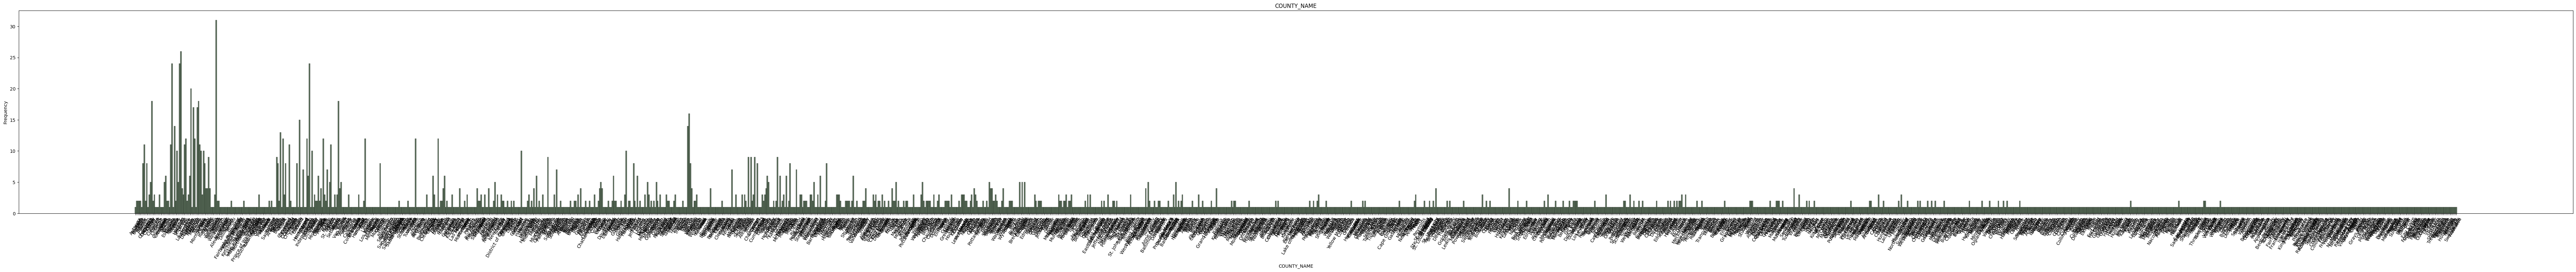

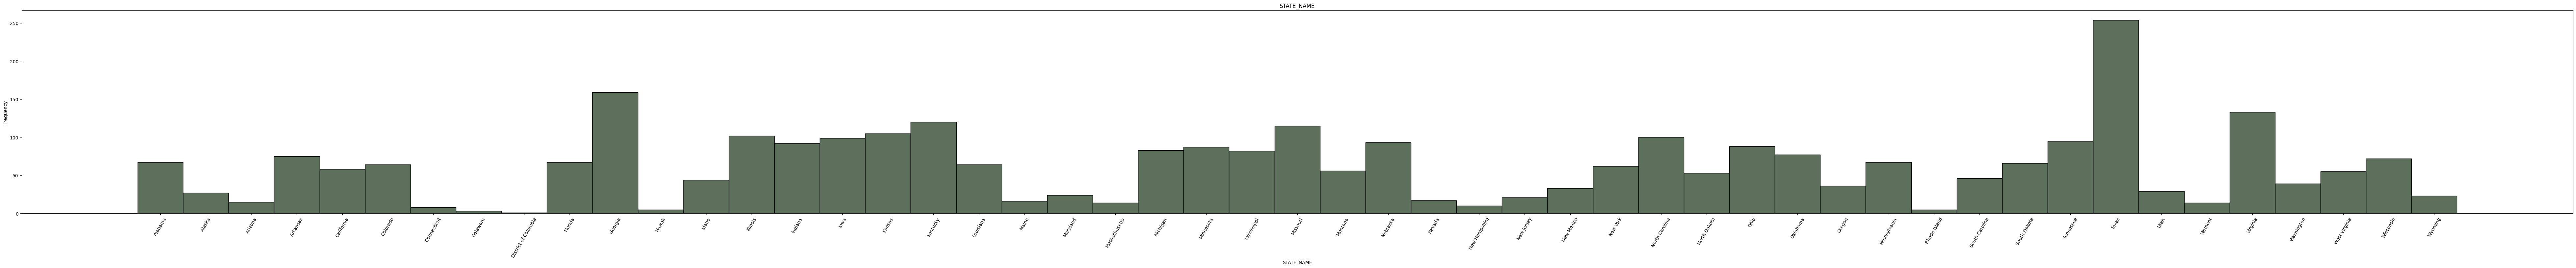

In [20]:
univariate_hist_2(categorical_list,clean_data,color=color)

Lo he intentado, no se ve nada.

##### Graficos Numericos


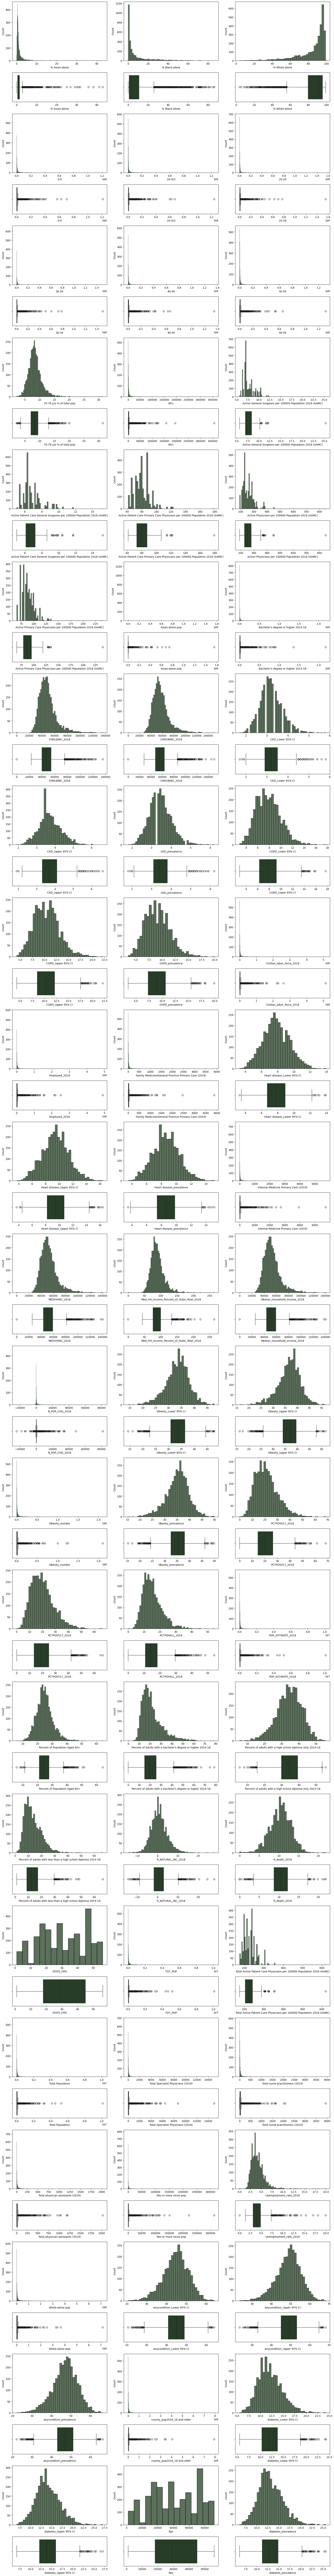

In [21]:
EDA.univariate_histbox(numerical_list, clean_data,color= color)


### Analisis multivariante

In [22]:
factorized_data = EDA.factorize_categorical(clean_data,categorical_list)

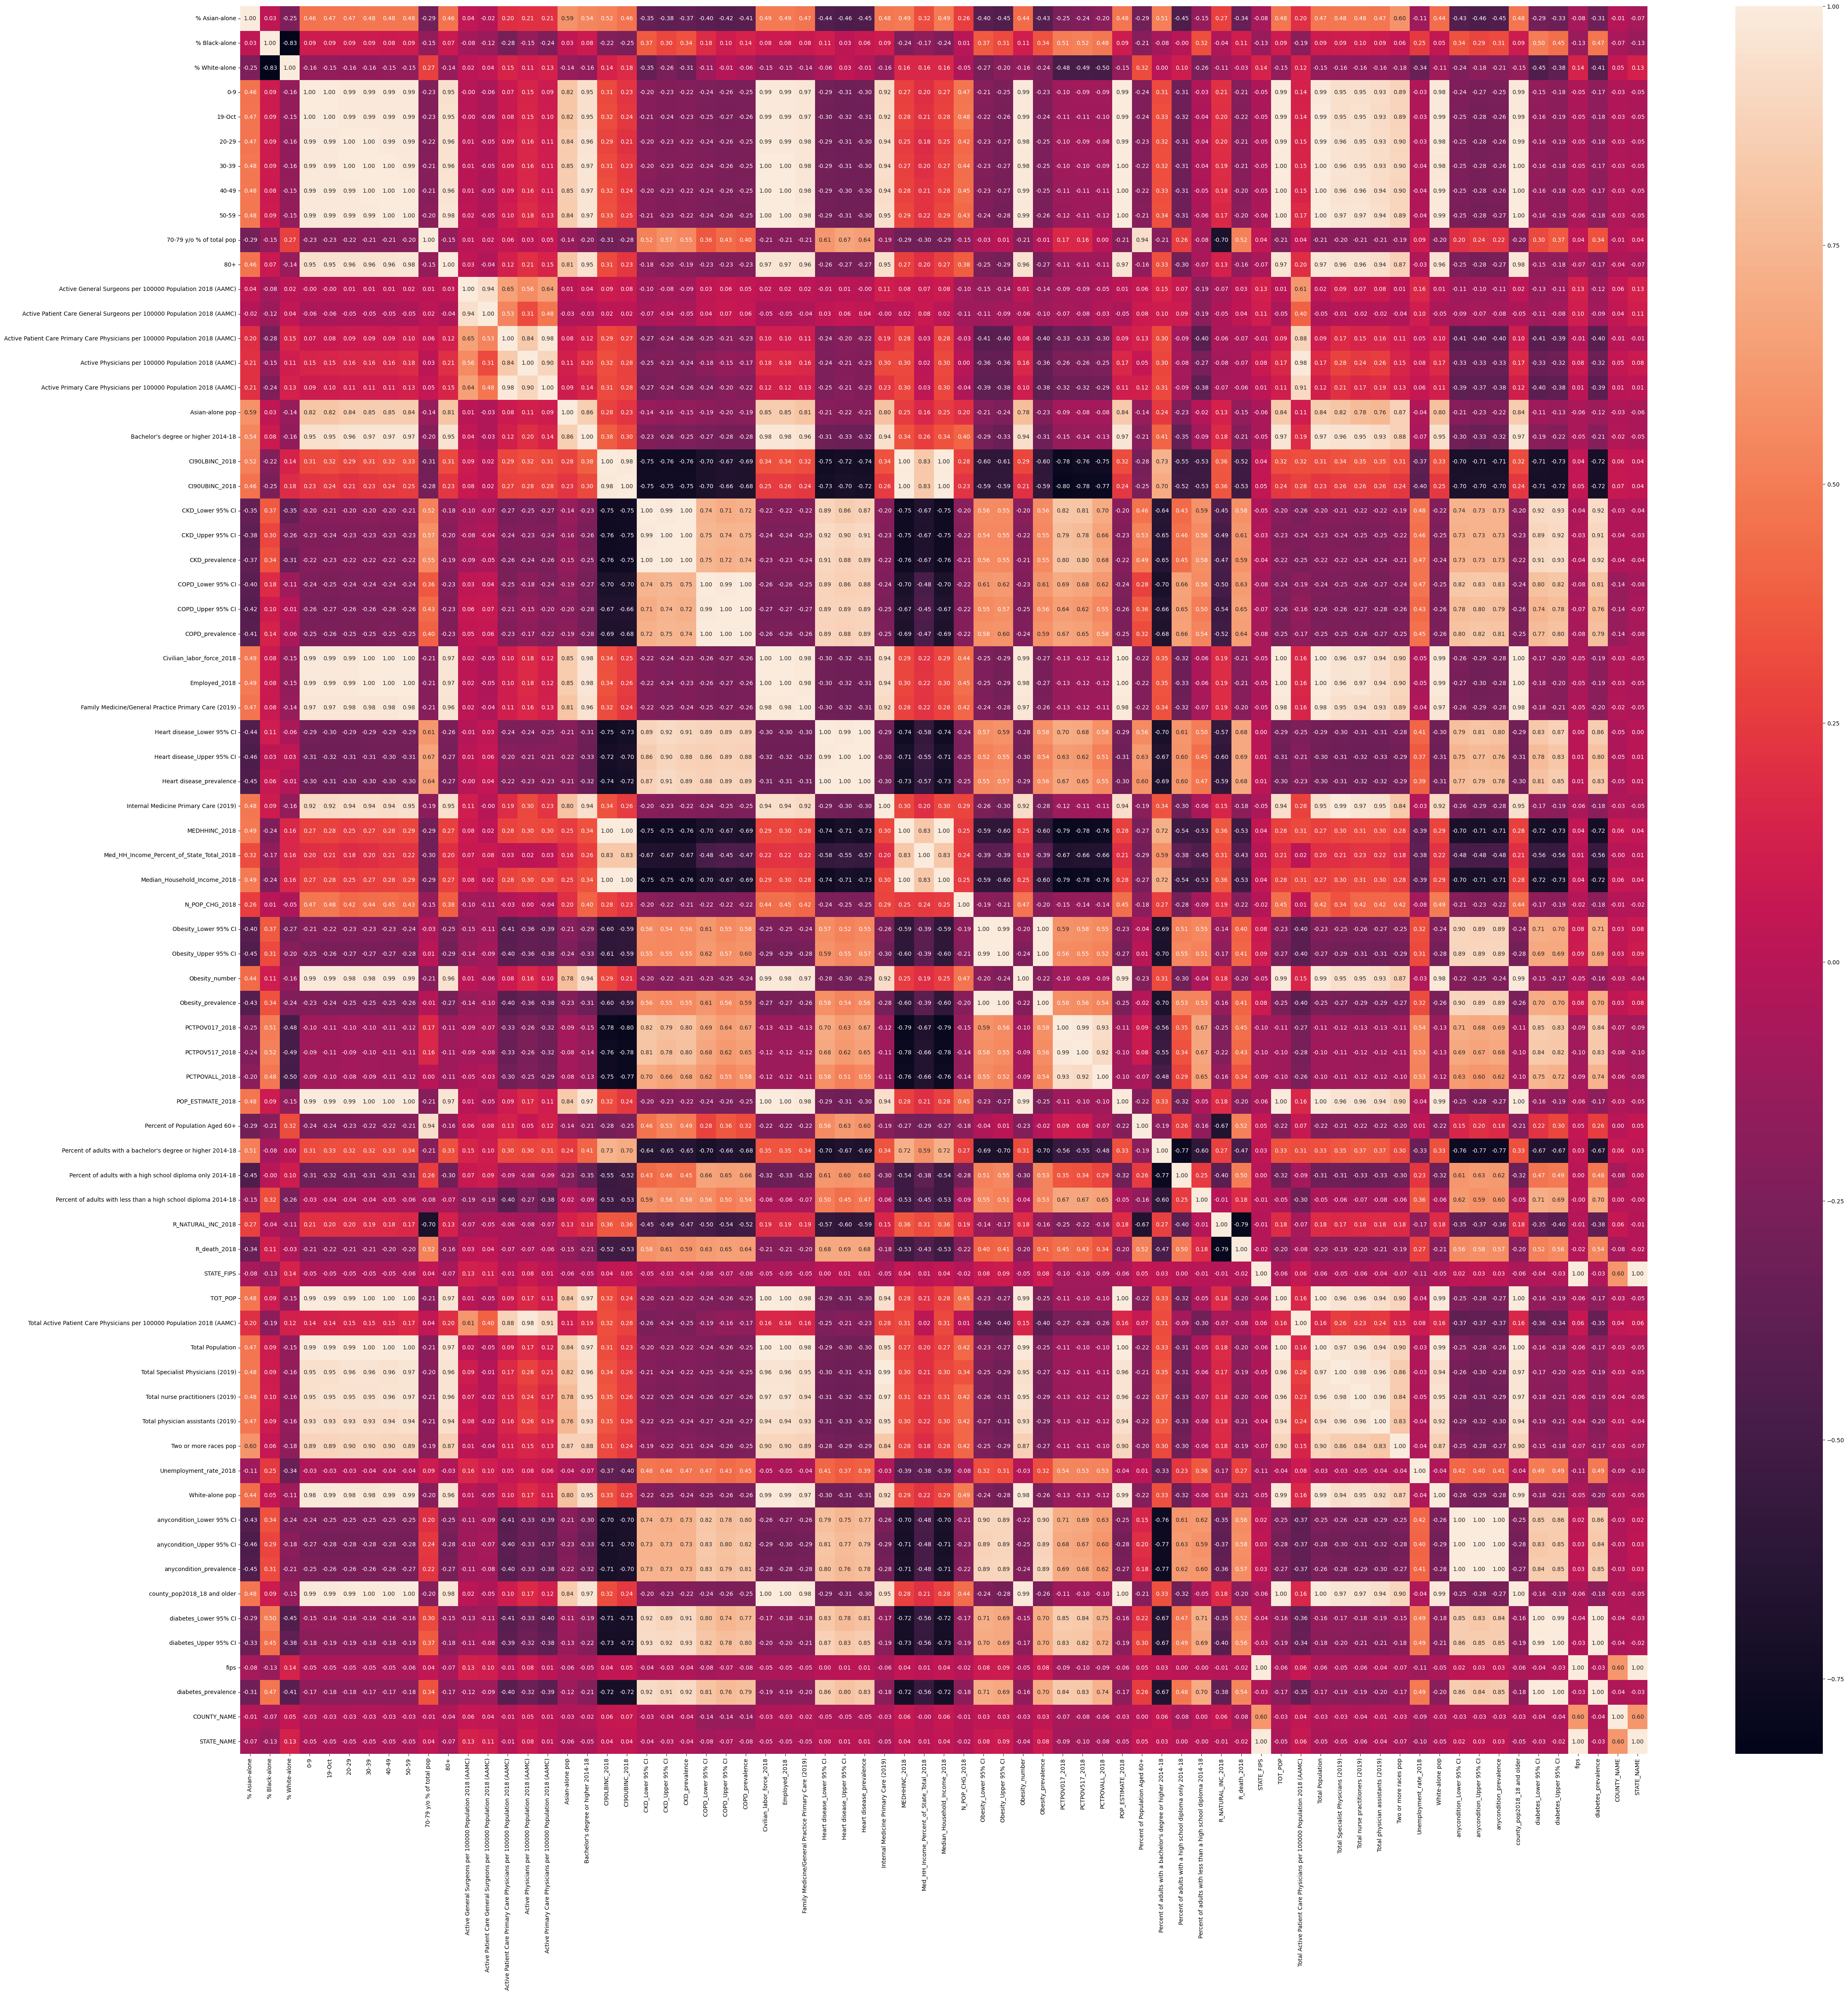

In [23]:
factorized_list = numerical_list+categorical_list
EDA.plt.subplots(figsize = (55, 55))
_ = EDA.sns.heatmap(factorized_data[factorized_list].corr(), annot = True, fmt = ".2f")


MEDHHINC_2018: Relacion directa entre los hogares con ingresos bajos y la prevalencia de diabetes.
CKD_prevalence: Como ya se sabe, existe una relacion directa entre la enfermedad de riñon y la diabetes.
Heart_deseas: Asi como con enfermedades del corazon.
obesity_prevalence: Obesidad vs Diabetes.
R_death_2018: Alta relacion entre mortalidad y diabetes.
Unemployed_2018: parece que hay una relacion directa entre el desempleo y la diabetes.

### DAY 2

Before doing the outliers treatmen we are goint to save a gourp of datasets with the actual `factorized_data`

In [25]:
factorized_data.to_csv('../data/processed/factorized_data.csv')
predictors = factorized_list[:-1]
target = 'diabetes_prevalence'
data_outlayers_dict = EDA.splitter('../data/processed/',predictors,target)


------------------------------

#TODO

#### Outliers

Reemplazo las que tienen contenidos fuera de sus medias y les meto la moda para que no afecten 

In [27]:
from edastatmil_milser.edas_tatmil import Do_enum
outliers, cleaned_df = EDA.outliers_iqr(factorized_data,'% Asian-alone',1,Do=Do_enum.NOTHING)


2.4011626914999997 -0.502092794
462 outliers have been found


In [29]:
import numpy as np
cleaned_df["% Asian-alone"] = np.where(cleaned_df["% Asian-alone"] > 2.4, 2.4, cleaned_df["% Asian-alone"])
cleaned_df["% Asian-alone"] = np.where(cleaned_df["% Asian-alone"] < -0.5, 0.5, cleaned_df["% Asian-alone"])


Now we save the data without outliers

In [30]:
factorized_data.to_csv('../data/processed/factorized_NoOutliers_data.csv')
predictors = factorized_list[:-1]
target = 'diabetes_prevalence'
data_dict = EDA.splitter('../data/processed/',predictors,target)

##### Mantener

Normalizadas

In [31]:
predictors = factorized_list[:-1]
data_norm_dict = EDA.normalize('../data/processed/SplitData/',predictors,scaler='StandardScaler')

### Day 3

mutual_info_classif en lugar de el anove si las variables son categoricas.

In [32]:
data_dict.keys()


dict_keys(['factorized_data_Xtrain', 'factorized_data_Xtest', 'factorized_data_ytrain', 'factorized_data_ytest', 'factorized_NoOutliers_data_Xtrain', 'factorized_NoOutliers_data_Xtest', 'factorized_NoOutliers_data_ytrain', 'factorized_NoOutliers_data_ytest'])

We use mutual_info_classif instead of mutual_info_regression becouse the parameters are related.

In [42]:
k=10
Xtrain_All = pd.read_csv('../data/processed/SplitData/NormData/factorized_data_Xtrain_norm.csv')
ytrain_All = pd.read_csv('../data/processed/SplitData/factorized_data_ytrain.csv')
Xtrain_Clean = pd.read_csv('../data/processed/SplitData/NormData/factorized_NoOutliers_data_Xtrain_norm.csv')
ytrain_Clean = pd.read_csv('../data/processed/SplitData/factorized_NoOutliers_data_ytrain.csv')

In [43]:
print(Xtrain_All.shape)
print(ytrain_All.shape)

print(Xtrain_Clean.shape)
print(ytrain_Clean.shape)


(2198, 70)
(2198, 1)
(2198, 70)
(2198, 1)


In [44]:
ytrain_All_series = ytrain_All.squeeze()
ytrain_Clean_series = ytrain_Clean.squeeze()


In [46]:

EDA.feature_sel(Xtrain_All,ytrain_All_series,k=50,file_name='All_Xtrain', method='SelectKBest', test='mutual_info_regression')
EDA.feature_sel(Xtrain_Clean,ytrain_Clean_series,k=50,file_name='Clean_Xtrain', method='SelectKBest', test='mutual_info_regression')



(      % Asian-alone  % Black-alone     30-39       80+  \
 0         -0.011639       3.579139 -0.233256 -0.281324   
 1         -0.162990      -0.506709 -0.176940 -0.102279   
 2         -0.355123      -0.194294  0.096210  0.441113   
 3         -0.369140      -0.284176 -0.158737 -0.201654   
 4          0.003338       3.169201 -0.001495 -0.043860   
 ...             ...            ...       ...       ...   
 2193      -0.102138      -0.580451 -0.176060 -0.210850   
 2194      -0.080349      -0.256726 -0.121411 -0.215254   
 2195      -0.380539       1.329438 -0.187728 -0.223059   
 2196      -0.318741      -0.618368 -0.259269 -0.276301   
 2197      -0.235064      -0.511165 -0.248220 -0.261233   
 
       Active General Surgeons per 100000 Population 2018 (AAMC)  \
 0                                             -0.467751           
 1                                             -0.543874           
 2                                              0.826339           
 3                

We can see that regardless of the dataset used, it is clear which columns are the most important for this dataset, as there is no difference between them.

________________________________________

### Modelo

In [48]:
Xtrain_All_ = pd.read_csv('../data/processed/SplitData/NormData/factorized_data_Xtrain_norm.csv')
ytrain_All_ = pd.read_csv('../data/processed/SplitData/factorized_data_ytrain.csv')
Xtest_All_ = pd.read_csv('../data/processed/SplitData/NormData/factorized_data_Xtest_norm.csv')
All_Xtest_sel = Xtest_All_ [Xtrain_All_.columns]
ytest_All_ = pd.read_csv('../data/processed/SplitData/factorized_data_ytest.csv')

Xtrain_Clean_ = pd.read_csv('../data/processed/SplitData/NormData/factorized_NoOutliers_data_Xtrain_norm.csv')
ytrain_Clean_ = pd.read_csv('../data/processed/SplitData/factorized_NoOutliers_data_ytrain.csv')
Xtest_Clean_ = pd.read_csv('../data/processed/SplitData/NormData/factorized_NoOutliers_data_Xtest_norm.csv')
Xtest_Clean_sel = Xtest_Clean_[Xtrain_Clean_.columns]
ytest_Clean_ = pd.read_csv('../data/processed/SplitData/factorized_NoOutliers_data_ytest.csv')

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

All_lasso_model = Lasso(alpha = 0.1, max_iter = 300)
All_lasso_model.fit(Xtrain_All_, ytrain_All_)
All_y_pred = All_lasso_model.predict(All_Xtest_sel)

mse = mean_squared_error(ytest_All_, All_y_pred)
print("MSE:", mse)
r2 = r2_score(ytest_All_, All_y_pred)
print("R-2:", r2)

MSE: 0.05926714592424788
R-2: 0.9924253042862207


C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.924e+00, tolerance: 1.592e+00
  model = cd_fast.enet_coordinate_descent(


In [50]:
Clean_lasso_model = Lasso(alpha = 0.1, max_iter = 300)
Clean_lasso_model.fit(Xtrain_Clean_, ytrain_Clean_)
Clean_y_pred = Clean_lasso_model.predict(Xtest_Clean_sel)

mse = mean_squared_error(ytest_Clean_, Clean_y_pred)
print("MSE:", mse)
r2 = r2_score(ytest_Clean_, Clean_y_pred)
print("R-2:", r2)

MSE: 0.05926714592424788
R-2: 0.9924253042862207


C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.924e+00, tolerance: 1.592e+00
  model = cd_fast.enet_coordinate_descent(


### Optimizacion


In [51]:
import numpy as np 
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(Xtrain_All_, ytrain_All_)
scores = clf.cv_results_["mean_test_score"]
print(scores)

[0.99998769 0.99998726 0.99998733 0.9999874  0.99998745 0.99998748
 0.99998754 0.99998758 0.99998742 0.9999872  0.99998711 0.99998696
 0.99998665 0.99998604 0.99998489 0.99998276 0.9999789  0.99997196
 0.9999596  0.99993768 0.999899   0.99983095 0.99971149 0.99950215
 0.99913576 0.99849604 0.99738111 0.99543749 0.99204946 0.98614201]
